In [1]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 2. Load the dataset
DATA_PATH = Path("data_train.xlsx")
df = pd.read_excel(DATA_PATH)

# 3. Check basic structure
print("Data shape:", df.shape)
print("\nColumn types:\n", df.dtypes.value_counts())

Data shape: (45569, 52)

Column types:
 float64           30
object            13
datetime64[ns]     5
int64              4
Name: count, dtype: int64



Missing values overview:
                 Feature  Missing_count  Missing_%
0              TEMP_MAX          45549      99.96
1              TEMP_MIN          45549      99.96
2         TIME_OF_ENTRY          43106      94.60
3          DOCUMENTS_BY          43083      94.54
4   START_DELIVERY_TIME           3147       6.91
5     END_DELIVERY_TIME           3143       6.90
6         END_LOAD_TIME           2815       6.18
7       START_LOAD_TIME           2809       6.16
8            CARGO_TYPE           2718       5.96
9            GOODS_TYPE            175       0.38
10         PAYMENT_TERM            118       0.26
11    END_DELIVERY_DATE              0       0.00
12              CUSTOMS              0       0.00
13         VEHICLE_TYPE              0       0.00
14            BODY_TYPE              0       0.00


C:\Users\abudzyns\AppData\Local\Temp\ipykernel_15804\2544331960.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Missing_%', y='Feature', data=top_missing_df, palette="Reds_r")


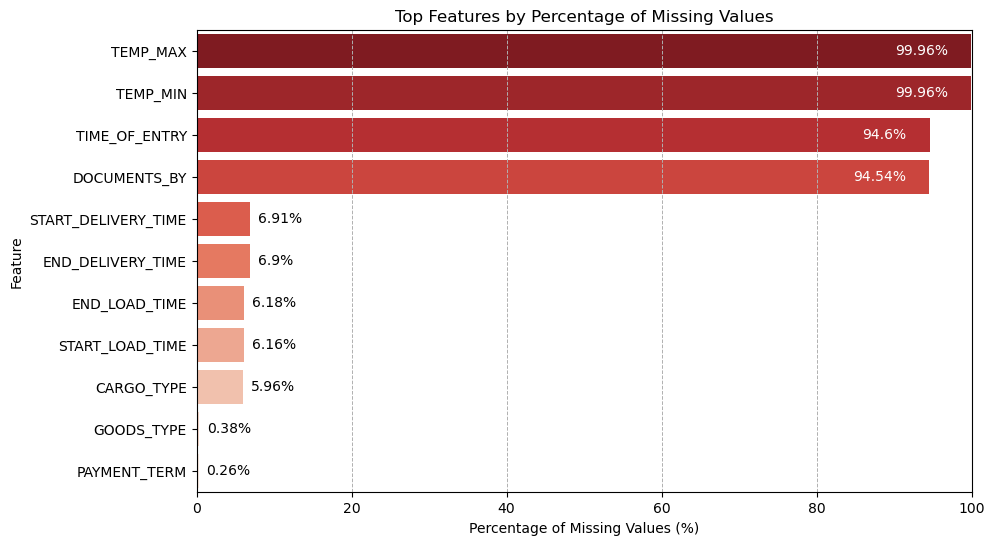

In [9]:
# 4. Missing values analysis
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    "Feature": missing_values.index,
    "Missing_count": missing_values.values,
    "Missing_%": missing_percent.values
})

# Display missing values overview
print("\nMissing values overview:\n", missing_df.head(15))

# Visualize missing values (formatted for article)
top_missing_df = missing_df[missing_df['Missing_%'] > 0].head(12)
plt.figure(figsize=(10, 6))
sns.barplot(x='Missing_%', y='Feature', data=top_missing_df, palette="Reds_r")
plt.title("Top Features by Percentage of Missing Values")
plt.xlabel("Percentage of Missing Values (%)")
plt.ylabel("Feature")
plt.xlim(0, 100)
for index, value in enumerate(top_missing_df['Missing_%']):
    if value > 15:
        plt.text(value - 3, index, f'{value}%', va='center', ha='right', color='white', fontsize=10)
    else:
        plt.text(value + 1, index, f'{value}%', va='center', ha='left', color='black', fontsize=10)
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.show()

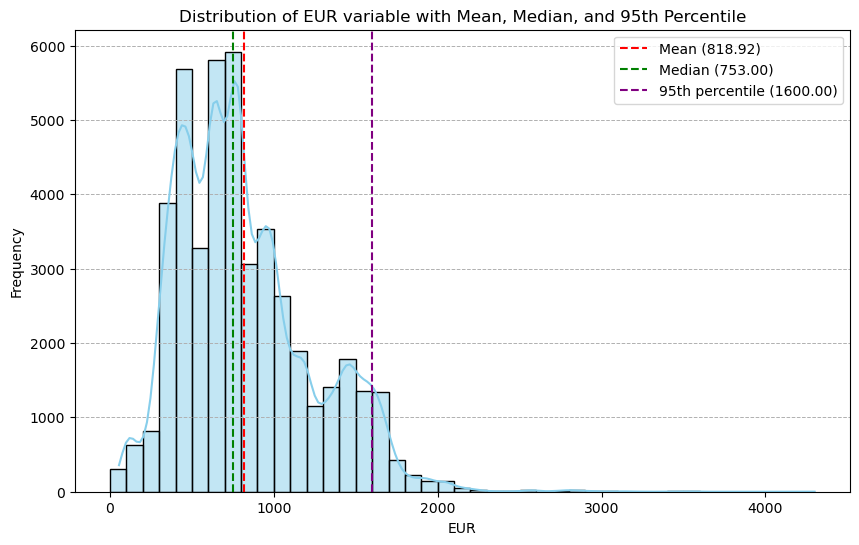

In [3]:
# 5. Analyze distribution of the target variable 'EUR' with custom bins and horizontal grid lines
plt.figure(figsize=(10, 6))
bins = np.arange(0, df['EUR'].max() + 100, 100)
sns.histplot(df['EUR'].dropna(), bins=bins, kde=True, color='skyblue')

# Add lines for mean, median, and 95th percentile
mean_val = df['EUR'].mean()
median_val = df['EUR'].median()
quantile_95 = df['EUR'].quantile(0.95)

plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.2f})')
plt.axvline(median_val, color='green', linestyle='--', label=f'Median ({median_val:.2f})')
plt.axvline(quantile_95, color='purple', linestyle='--', label=f'95th percentile ({quantile_95:.2f})')

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.title("Distribution of EUR variable with Mean, Median, and 95th Percentile")
plt.xlabel("EUR")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Top 10 features correlated with EUR after adding TOTAL_KM:
 EUR               1.000000
TOTAL_KM          0.919782
DE_KM             0.740586
PL_KM             0.538304
QTY_LOADS         0.464913
QTY_DELIVERIES    0.460308
M3                0.193033
HEIGHT            0.192402
BE_KM             0.172209
IT_KM             0.159773
FR_KM             0.150575
Name: EUR, dtype: float64


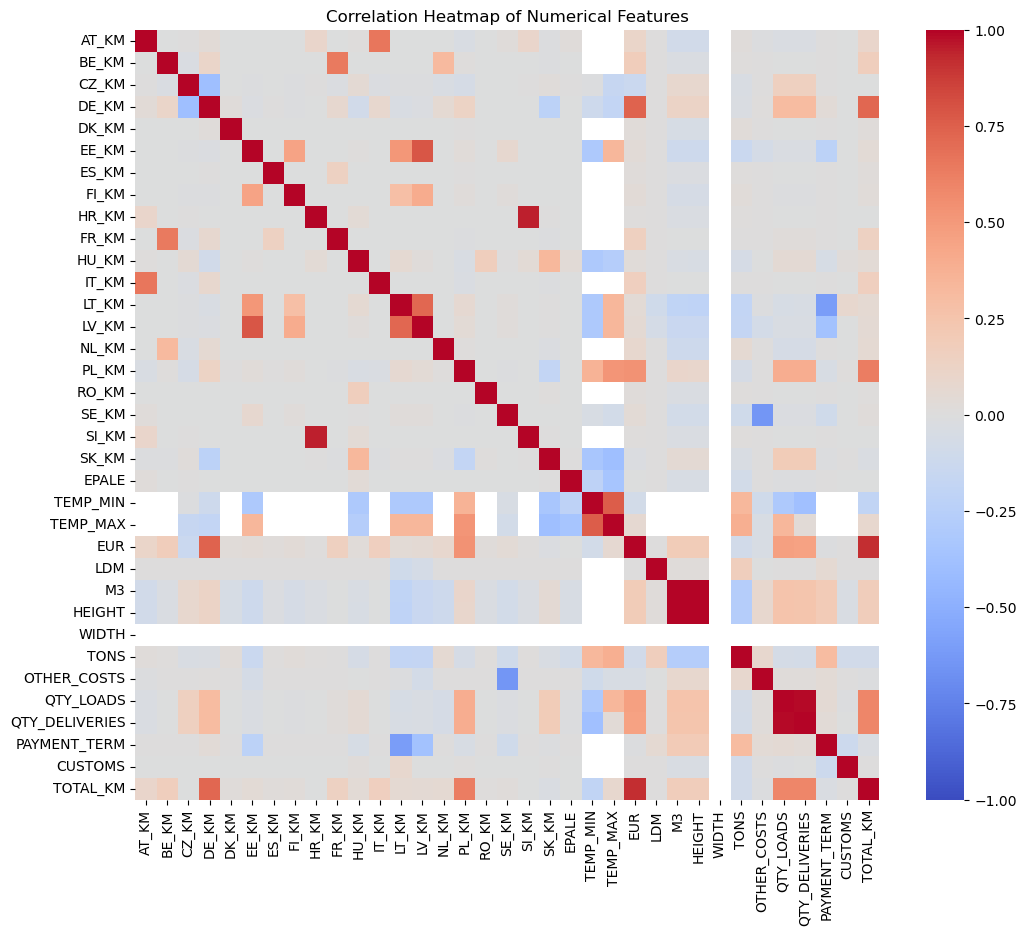

In [4]:
# 6. Create new feature 'TOTAL_KM' summing all KM features
km_columns = [col for col in df.columns if '_KM' in col]
df['TOTAL_KM'] = df[km_columns].sum(axis=1)

# Correlation analysis with numerical features
numerical_features = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numerical_features.corr()

# Show top correlations with EUR
corr_with_eur = corr_matrix['EUR'].abs().sort_values(ascending=False)
print("\nTop 10 features correlated with EUR after adding TOTAL_KM:\n", corr_with_eur.head(11))

# Visualize correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [5]:
# 7. Prepare for feature selection (evolutionary feature selection in next steps)
# Selecting only highly correlated numerical features as candidates for selection
high_corr_features = corr_with_eur[corr_with_eur > 0.1].index.tolist()
print("\nSelected features for evolutionary feature selection:\n", high_corr_features)

# Save selected features for next notebook (optional)
df_selected = df[high_corr_features].copy()
df_selected.to_csv("selected_features.csv", index=False)

# Save missing values table for the article
missing_df.to_csv("missing_values_overview.csv", index=False)


Selected features for evolutionary feature selection:
 ['EUR', 'TOTAL_KM', 'DE_KM', 'PL_KM', 'QTY_LOADS', 'QTY_DELIVERIES', 'M3', 'HEIGHT', 'BE_KM', 'IT_KM', 'FR_KM', 'CZ_KM', 'AT_KM']


PermissionError: [Errno 13] Permission denied: 'missing_values_overview.csv'